In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import matplotlib.image as mpimg
from PIL import Image
import json
import torch.nn as nn
from collections import OrderedDict

In [144]:
from __future__ import print_function, division

In [145]:
dataset_dir='flowers'

In [154]:
##def mtransLoad(dataset_dir, phase):
print("\n iTrace Begins - inside mtransLoad in ttrainer \n")
print("\n iTrace Begins - Normalising images with mean and SD for converting the values of each color channel to be between -1 and 1 instead of 0 and 1. \n")
print("\niTrace Rubric - one random scaling, Rotation, mirroring or cropping to (224x224 pix) in transform dictionary for three keys depending on training or validation\n")
##Check Phase and set training /testing/validation transform
##Check Phase and set training /testing/validation data sub dir

## if phase=='train':
print("\niTrace Composing Training transforms in mtransLoad \n")
train_transforms = transforms.Compose([
transforms.RandomRotation(43),
transforms.RandomHorizontalFlip(),
transforms.RandomVerticalFlip(),
transforms.RandomResizedCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## trg_dir = dataset_dir + '/train/'
## print("\niTrace Training Phase in mtransLoad trg dir is  %s\n",trg_dir)
## train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms) 
## trainloader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)
## loaded_datasets = trainloader
## if phase=='valida':

print("\niTrace Composing Validation transforms in mtransLoad \n")
valid_transforms = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ])
## valid_data = datasets.ImageFolder(data_dir + '/valid', transform=valid_transforms)
## valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=2)
## loaded_datasets = valid_loader
## if phase=='test':
print("\niTrace Composing Testing transforms in mtransLoad \n")
test_transforms = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ])


## create image dataset dictionary img_dsd
print("\niTrace Creating Image dataset dictionary for loading in mtransLoad \n")

img_dsd = {'train':'','test':'','valid':''}
print("\niTrace Image dataset dictionary created in mtransLoad \n")
print("\niTrace Loading OS valid FS objects using ImageFolder from dir and transforms in mtransLoad \n")
trg_val =datasets.ImageFolder(root=dataset_dir + '/train',transform=train_transforms)
tst_val =datasets.ImageFolder(root=dataset_dir + '/test',transform=test_transforms)
vali_val =datasets.ImageFolder(root=dataset_dir + '/valid',transform=valid_transforms)

print("\niTrace Adding FS objects tensors loaded through ImageFolder and transforms in Image dataset dictionary - mtransLoad \n")
img_dsd['train']= trg_val
img_dsd['test']= tst_val
img_dsd['valid']= vali_val

print("\niTrace Rubric Image dataser dictionary for training, test and validation data created - mtransLoad \n")
#print(img_dsd)
print("\niTrace Rubric - Batch sizing,shuffling for training and optimised loading of tensors with DataLoader - mtransLoad \n")
    
trainloader = data.DataLoader(img_dsd['train'], batch_size=4, shuffle=True, num_workers=2)
testloader = data.DataLoader(img_dsd['test'], batch_size=4, num_workers=2)
validloader = data.DataLoader(img_dsd['valid'], batch_size=4, num_workers=2)

print("\niTrace completed - Tensor objects of images are loaded and ready for computation  - mtransLoad \n")

print("\niTrace completed - Loading data and Batch sizing,completed, tensor objects in place  - mtransLoad \n")



 iTrace Begins - inside mtransLoad in ttrainer 


 iTrace Begins - Normalising images with mean and SD for converting the values of each color channel to be between -1 and 1 instead of 0 and 1. 


iTrace Rubric - one random scaling, Rotation, mirroring or cropping to (224x224 pix) in transform dictionary for three keys depending on training or validation


iTrace Composing Training transforms in mtransLoad 


iTrace Composing Validation transforms in mtransLoad 


iTrace Composing Testing transforms in mtransLoad 


iTrace Creating Image dataset dictionary for loading in mtransLoad 


iTrace Image dataset dictionary created in mtransLoad 


iTrace Loading OS valid FS objects using ImageFolder from dir and transforms in mtransLoad 


iTrace Adding FS objects tensors loaded through ImageFolder and transforms in Image dataset dictionary - mtransLoad 


iTrace Rubric Image dataser dictionary for training, test and validation data created - mtransLoad 


iTrace Rubric - Batch sizing,shuffl

In [155]:
trg_val.samples

[('flowers/train/1/image_06736.jpg', 0),
 ('flowers/train/1/image_06741.jpg', 0),
 ('flowers/train/1/image_06744.jpg', 0),
 ('flowers/train/1/image_06750.jpg', 0),
 ('flowers/train/10/image_07087.jpg', 1),
 ('flowers/train/10/image_07096.jpg', 1),
 ('flowers/train/10/image_07098.jpg', 1),
 ('flowers/train/2/image_05091.jpg', 2),
 ('flowers/train/2/image_05097.jpg', 2),
 ('flowers/train/2/image_05106.jpg', 2),
 ('flowers/train/3/image_06614.jpg', 3),
 ('flowers/train/3/image_06616.jpg', 3),
 ('flowers/train/3/image_06618.jpg', 3),
 ('flowers/train/4/image_05634.jpg', 4),
 ('flowers/train/4/image_05636.jpg', 4),
 ('flowers/train/4/image_05637.jpg', 4),
 ('flowers/train/4/image_05638.jpg', 4),
 ('flowers/train/5/image_05161.jpg', 5),
 ('flowers/train/5/image_05164.jpg', 5),
 ('flowers/train/5/image_05167.jpg', 5),
 ('flowers/train/5/image_05174.jpg', 5),
 ('flowers/train/6/image_07165.jpg', 6),
 ('flowers/train/6/image_07169.jpg', 6),
 ('flowers/train/6/image_07178.jpg', 6),
 ('flowers/tr

In [156]:
len(trg_val.samples)

34

In [149]:
trg_val.classes

['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [150]:
len(tst_val.samples)

55

In [157]:
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
##Set labels from Json    

In [158]:
class_names = list(cat_to_name.values())

In [153]:
class_names

['canterbury bells',
 'pink primrose',
 'moon orchid',
 'globe thistle',
 'tiger lily',
 'monkshood',
 'sweet pea',
 'hard-leaved pocket orchid',
 'english marigold',
 'bird of paradise']

In [138]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Using the image datasets, define the dataloaders
dataloaders = {
    x: data.DataLoader(img_dsd[x], batch_size=6, shuffle=True, num_workers=2)
    for x in list(img_dsd.keys())
}

In [139]:
tensinputs, tensclasses = next(iter(dataloaders['train']))

In [140]:
tensclasses

tensor([ 7,  6,  1,  9,  1,  4])

Printing in Progress.Please wait. Progress 0%


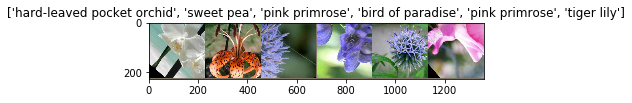

Printing completed 100%. Thanks for waiting.


In [141]:
# Make a grid from batch
#torchvision.utils.make_grid(tensor, nrow=8, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)

out = torchvision.utils.make_grid(tensinputs)

jslabels = list(cat_to_name.values())

print("Printing in Progress.Please wait. Progress 0%")

imshow(out, title=[jslabels[x] for x in tensclasses])

print("Printing completed 100%. Thanks for waiting.")

In [163]:
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [187]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [188]:
device

device(type='cpu')

In [189]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()
    #DeepCopy is used to completely create a var and make a copy without referencing as normal copy
    #as a result, changes can be made independently
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        print("\n Each Epoch will have a training and a test/val phase")
        for phase in ['train', 'test']:
            if phase == 'train':
                print("\n In training phase, set model to training and use scheduler for dropping learning rate")
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                print("\n In evaluation mode, set model to eval mode")      
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in trainloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    print("\n In training, so gradient is enabled")        
                    outputs = model(inputs)
                    print("\n In training, outputs obtained from inputs")     
                    _, preds = torch.max(outputs, 1)
                    print("\n In training, predictions done, time to cal loss")    
                    loss = criterion(outputs, labels)
                    print("\n In training,loss calculated based on criteria using outputs and labels")    

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        print("\n In training,loss is used to back propagate and optimiser to optimise model")    
                        loss.backward()
                        optimizer.step()

                # statistics
                print("\nRunning loss and accuracy calculations")      
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print("\nEpoch level loss and accuracy loss and accuracy calculations")           

            print('Phase :{} Epoch Loss: {:.4f} Epoch Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                print("\nIn phase of val and epoch acc is greaet than best accuracy")      
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                print("\n Found and copied best model weights from state dict")

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best value of Accuracy picked is : {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    print("\nModel state dictionary loaded with best model weights, selected")
    return model

In [190]:
model_ft = models.alexnet(pretrained=True)


In [191]:
model_ft

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [192]:
#Pre-Trained model is already trained, we do not have to train it so freeze the model, ie model with weights and biases
for param in model_ft.parameters():
    param.requires_grad = False


In [211]:
#Define a new classifer for alex net
#Stitch alex net classifier to pre trained main net
from collections import OrderedDict
new_classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(9216, 4500)),
                          ('relu1', nn.ReLU()),
                          ('fc2', nn.Linear(4500, 2000)),
                          ('relu2', nn.ReLU()),
                          ('fc3', nn.Linear(2000, 500)),
                          ('relu3', nn.ReLU()),
                          ('output', nn.Linear(500, 10)),
    
                         ## four  options, none, logits,softmax,log softmax   
                         ##  ('output', nn.Softmax(dim=1))
                         ## ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model_ft.classifier = new_classifier

In [194]:
#verify, make sure net of pre trained (wt and bias are frozen and only classifier part is trained)

In [195]:
model_ft

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4500, bias=True)
    (relu): ReLU()
    (fc2): Linear(in_features=4500, out_features=2000, bias=True)
    (fc3): Linear(in_features

In [174]:
#num_ftrs = model_ft.classifier.in_features
#model_ft.classifier = nn.Linear(num_ftrs, 10)



In [196]:
model_ft = model_ft.to(device)



In [197]:
criterion = nn.CrossEntropyLoss()



In [199]:
# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

optimizer_ft = optim.Adam(model_ft.classifier.parameters(), lr=0.9)

In [200]:
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [201]:
#For training
dataset_sizes ={'train':len(trg_val.samples),'test':len(tst_val.samples)}
                
#dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

In [202]:
dataset_sizes

{'test': 55, 'train': 34}

In [203]:
dataloaders['train']=trg_val

In [204]:
dataloaders['test']=tst_val

In [205]:
for inputs, labels in trainloader:
                inputs 
                labels 

In [206]:
labels

tensor([ 9,  9])

In [207]:
inputs

tensor([[[[-1.9467, -1.0048, -0.8335,  ...,  1.2214,  1.2728,  0.9988],
          [-1.9467, -1.1075, -0.9705,  ...,  1.1015,  1.1358,  0.1768],
          [-1.9638, -1.2103, -1.0733,  ...,  0.8789,  0.3481, -0.4226],
          ...,
          [ 1.6153,  1.6495,  1.6838,  ...,  1.6495, -1.5528, -2.1179],
          [ 1.5639,  1.6153,  1.6667,  ...,  0.6049, -1.9124, -2.1179],
          [ 1.5125,  1.5468,  1.6153,  ...,  0.0398, -2.1179, -2.1179]],

         [[-1.7731, -0.3901, -0.1275,  ...,  0.8704,  0.9405,  0.6604],
          [-1.7731, -0.4426, -0.2150,  ...,  0.7304,  0.7479, -0.1975],
          [-1.7731, -0.4951, -0.2850,  ...,  0.4678, -0.0574, -0.8102],
          ...,
          [ 0.8704,  0.9055,  0.9405,  ...,  1.4132, -1.5280, -2.0357],
          [ 0.8179,  0.8704,  0.9230,  ...,  0.4853, -1.8606, -2.0357],
          [ 0.7654,  0.8004,  0.8704,  ..., -0.0224, -2.0357, -2.0357]],

         [[-1.6824, -1.0550, -0.9156,  ...,  2.3786,  2.4483,  2.3786],
          [-1.6824, -1.1073, -

In [208]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------

 In training phase, set model to training and use scheduler for dropping learning rate

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propaga


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

Epoch level loss and accuracy loss and accuracy calculations
Phase :train Epoch Loss: 200626853285.6471 Epoch Acc: 0.0882

 In evaluation mode, set model to eval mode

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and ac


 Found and copied best model weights from state dict

Epoch 3/4
----------

 In training phase, set model to training and use scheduler for dropping learning rate

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using output


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

Epoch level loss and accuracy loss and accuracy calculations
Phase :train Epoch Loss: 6302654164.3088 Epoch Acc: 0.1471

 In evaluation mode, set model to eval mode

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accu

In [209]:
#model_ft = models.resnet18(pretrained=True)
#num_ftrs = model_ft.fc.in_features
#model_ft.fc = nn.Linear(num_ftrs, 10)

#model_ft = model_ft.to(device)

#criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [210]:
trained_model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=25)

Epoch 0/24
----------

 In training phase, set model to training and use scheduler for dropping learning rate

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propag


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

Epoch level loss and accuracy loss and accuracy calculations
Phase :train Epoch Loss: 10847343997.5294 Epoch Acc: 0.0882

 In evaluation mode, set model to eval mode

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and acc


 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enab


Running loss and accuracy calculations

Epoch level loss and accuracy loss and accuracy calculations
Phase :train Epoch Loss: 21305667235.0597 Epoch Acc: 0.1471

 In evaluation mode, set model to eval mode

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outpu


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calcula


 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gr


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calcula


 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gr


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calcula


 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gr


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calcula


 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gr


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calcula


 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gr


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calcula


 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

Running loss and accuracy calculations

 In training, so gr


Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calculations

 In training, so gradiend is enabled

 In training, outputs obtained from inputs

 In training, predictions done, time to cal loss

 In training,loss calculated based on criteria using outputs and labels

 In training,loss is used to back propagate and optimiser to optimise model

Running loss and accuracy calcula

In [111]:
def cust_viz(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        #title=title.append('ground truth')
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


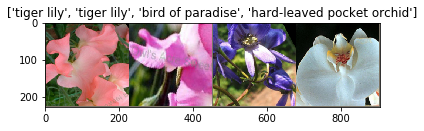

In [114]:

#Prediction data loaded as tensor = validloader
#Testing data loaded as tensor and tested = testloader
#Training data loaded as tensor and tested = trainloader

##Training data loader
inputs, classes = next(iter(trainloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

cust_viz(out, title=[class_names[x] for x in classes])

In [ ]:
## Test Test Data by loading test loader

#Define a cutom viz function

In [100]:
def visualize_model(model,to_predict, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(to_predict):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                cust_viz(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

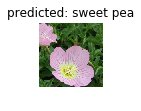

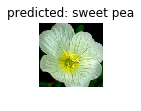

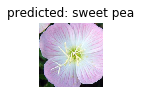

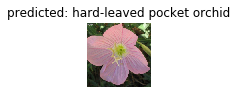

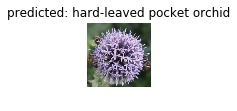

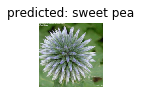

In [109]:
#visualize_model(model_ft)
#Prediction data loaded as tensor = validloader
#Testing data loaded as tensor and tested = testloader
#Training data loaded as tensor and tested = trainloader

to_predict_loader = validloader
visualize_model(trained_model_ft,to_predict_loader )

In [104]:
trained_model_ft.state_dict()

OrderedDict([('features.0.weight',
              tensor([[[[ 0.1186,  0.0941,  0.0954,  ...,  0.0558,  0.0216,  0.0500],
                        [ 0.0749,  0.0389,  0.0530,  ...,  0.0257, -0.0113,  0.0042],
                        [ 0.0754,  0.0388,  0.0549,  ...,  0.0436,  0.0102,  0.0133],
                        ...,
                        [ 0.0932,  0.1037,  0.0675,  ..., -0.2028, -0.1284, -0.1122],
                        [ 0.0435,  0.0649,  0.0362,  ..., -0.2025, -0.1138, -0.1072],
                        [ 0.0474,  0.0625,  0.0248,  ..., -0.1184, -0.0956, -0.0839]],
              
                       [[-0.0726, -0.0580, -0.0807,  ..., -0.0006, -0.0253,  0.0255],
                        [-0.0690, -0.0676, -0.0764,  ..., -0.0040, -0.0304,  0.0105],
                        [-0.0995, -0.0856, -0.1052,  ..., -0.0266, -0.0228,  0.0066],
                        ...,
                        [-0.1512, -0.0887, -0.0967,  ...,  0.3085,  0.1810,  0.0843],
                        [-0.143

In [105]:
print("\n To Save\n")

checkpoint = {
    'arch': 'alexnet',
    'doneBy':'Richard Vijay',
    'date':'22-07-18',
    'hiddenUnitSc':'7510', 
    'hiddenlayersC': '4',
    'lastNNLayerCust':'none',
    'optimizer':'adam',
    'learningrt':'0.01',
    'state_dict': model_ft.state_dict()
}

torch.save(checkpoint, 'TTLearnPYTOffBasedAlexNsmsampFlower22Jul18V1.pt')

print("\nSaved\n")


 To Save


Saved



In [215]:
# Test out  network!

tdataiter = iter(testloader)
timages, tlabels = tdataiter.next()
timg = timages[0]
# Convert 2D image to 1D vector
#timg = timg.resize_(1, 784)


In [217]:
timg

tensor([[[-1.9124, -1.7925, -1.5357,  ..., -0.0287, -0.0458, -0.0801],
         [-1.8782, -1.8439, -1.7069,  ...,  0.0056, -0.0287, -0.0801],
         [-1.8439, -1.8439, -1.8610,  ...,  0.0398,  0.0056, -0.0801],
         ...,
         [-0.4054, -0.4397, -0.3369,  ..., -1.0733, -1.0733, -1.0219],
         [-0.3369, -0.3541, -0.2342,  ..., -1.0904, -1.2103, -1.1247],
         [-0.4054, -0.2342, -0.1143,  ..., -1.1247, -1.2788, -1.2103]],

        [[-1.4055, -1.2829, -1.0028,  ..., -0.0399, -0.0574, -0.0749],
         [-1.3880, -1.3529, -1.1779,  ..., -0.0224, -0.0224, -0.0399],
         [-1.3529, -1.3529, -1.3354,  ...,  0.0301, -0.0049, -0.0399],
         ...,
         [-0.2150, -0.3200, -0.3025,  ..., -0.3200, -0.3200, -0.2675],
         [-0.1800, -0.3025, -0.2150,  ..., -0.3200, -0.4251, -0.3901],
         [-0.2500, -0.1625, -0.0924,  ..., -0.3550, -0.4951, -0.4776]],

        [[-1.5430, -1.4210, -1.1770,  ...,  0.1302,  0.1302,  0.1128],
         [-1.4907, -1.4733, -1.3164,  ...,  0

In [216]:
with torch.no_grad():
    tlogits = trained_model_ft.forward(timg)



RuntimeError: expected stride to be a single integer value or a list of 1 values to match the convolution dimensions, but got stride=[4, 4]

In [ ]:
#tprobs = F.softmax(tlogits, dim=1)
#Options, softmax or logsoftmax or none

# Plot the image and probabilities
#helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')
# ie #helper.view_classify(timg.resize_(1, 28, 28), tprobs, version='Fashion')

#sqprobs = tprobs.data.numpy().squeeze()
#fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
#ax1.imshow(timg.resize_(1, 28, 28).numpy().squeeze())
#ax1.axis('off')
#ax2.barh(np.arange(10), sqprobs)
#ax2.set_aspect(0.1)
#ax2.set_yticks(np.arange(10))
#ax2.set_yticklabels(class_names);
#ax2.set_title('Class Probability')
#ax2.set_xlim(0, 1.1)

#plt.tight_layout()
